# **Import Libraries**

In [1221]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1222]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import random # to generate random values

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# **Import Data**

In [1223]:
df = pd.read_csv("./diabetic_data.csv")

In [1224]:
df.shape

(101766, 50)

In [1225]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Attribute Description 

Encounter ID: Unique identifier of an encounter

Patient number: Unique identifier of a patient

Race Values: Caucasian, Asian, African American, Hispanic, and other

Gender Values: male, female, and unknown/invalid

Age: Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)

Weight: Weight in Kg

Admission type: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available

Discharge disposition: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

Admission source: Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

Time in hospital: Integer number of days between admission and discharge

Payer code : Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

Medical specialty: Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

Number of lab procedures: Number of lab tests performed during the encounter

Number of procedures: Numeric Number of procedures (other than lab tests) performed during the encounter

Number of medications: Number of distinct generic names administered during the encounter

Number of outpatient visits: Number of outpatient visits of the patient in the year preceding the encounter

Number of emergency visits: Number of emergency visits of the patient in the year preceding the encounter

Number of inpatient visits: Number of inpatient visits of the patient in the year preceding the encounter

Diagnosis 1: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

Diagnosis 2: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

Diagnosis 3: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

Number of diagnoses : Number of diagnoses entered to the system 0%

Glucose serum test : result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

A1c test result : Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

Change of medications : Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

Diabetes medications : Indicates if there was any diabetic medication prescribed. Values: “yes” and “no” 24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

Readmitted: Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

# Imputed Weight

In [1226]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


In [1227]:
race_counts = df['race'].value_counts()
print(race_counts)

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [1228]:
weight_counts = df['weight'].value_counts()
print(weight_counts)


# 1. The brackets will be removed and a random number, from within the given range, will be generated.
# 
# 2. The values ">200" will be removed
# 
# 3. We will use the generated figures to help generate a model to help impue the 98,569 missing values.

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64


In [1229]:
# replacing value in the "race" column

# replace '?' with 'other' in 'race' column
df['race'] = df['race'].replace('?', 'Other')

In [1230]:
# Removing unwanted rows

# remove rows where the 'gender' column contains 'Unknown/Invalid'
df = df[df['gender'] != 'Unknown/Invalid']

In [1231]:
# remove rows where the 'weight' column contains '>200'
df = df[df['weight'] != '>200']


In [1232]:

# define a function to transform the "weight" column
def transform_weight(w):
    if w == '?':
        return w
    else:
        a, b = w[1:-1].split('-')
        return np.random.uniform(float(a), float(b))

In [1233]:
# apply the function to the "weight" column
df['weight'] = df['weight'].apply(transform_weight)


In [1234]:
# define a function to generate a random age given an age range string
def generate_age_from_range(age_range_str):
    # remove the brackets from the age range string
    age_range_str = age_range_str.replace('[', '').replace(')', '')

    # convert the age range string to a tuple of integers
    age_range = tuple(map(int, age_range_str.split('-')))

    # generate a random age between the two numbers in the age range
    generated_age = random.randint(age_range[0], age_range[1])

    return generated_age

In [1235]:
# apply the function to the 'age_range' column to generate a new 'age' column
df['age'] = df['age'].apply(generate_age_from_range)

In [1236]:
race_counts = df['race'].value_counts()
print(race_counts)

Caucasian          76097
AfricanAmerican    19209
Other               3776
Hispanic            2037
Asian                641
Name: race, dtype: int64


In [1237]:
age_counts = df['age'].value_counts()
print(age_counts)

70    4498
80    3784
60    3715
50    2435
76    2429
      ... 
2       14
9       14
6       12
0       11
8       10
Name: age, Length: 101, dtype: int64


In [1238]:
weight_counts = df['weight'].value_counts()
print(weight_counts)

?                     98566
84.94993826535867         1
102.22226589661679        1
81.0636808692             1
123.96771889750814        1
                      ...  
83.88987150265065         1
72.03811047811067         1
69.64776876655667         1
92.29665459308883         1
167.76409181805695        1
Name: weight, Length: 3195, dtype: int64


In [1239]:
# replace '?' with '' in 'weight' column
df['weight'] = df['weight'].replace('?', '')

In [1240]:
df.to_csv('diabetic_datanew.csv', index=False)

In [1241]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [1242]:
# Load the data
df = pd.read_csv('diabetic_datanew.csv')

In [1243]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,3,NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,14,NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,20,NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35,NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,41,NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [1244]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [1245]:
# One-hot encode 'race' and 'gender' columns
race_encoded = pd.get_dummies(df['race'], prefix='race')
gender_encoded = pd.get_dummies(df['gender'], prefix='gender')

In [1246]:
# Combine the encoded columns with the numerical columns
df_encoded = pd.concat([df[['weight', 'age']], race_encoded, gender_encoded], axis=1)

In [1247]:

# Split the dataset into two parts: missing weight and known weight
df_missing_weight = df_encoded[df_encoded['weight'].isnull()]
df_known_weight = df_encoded[df_encoded['weight'].notnull()]

In [1248]:
# Split the dataset with known weight values into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_known_weight.drop('weight', axis=1),
    df_known_weight['weight'],
    test_size=0.2,
    random_state=42
)

In [1249]:
# Train a Random Forest Regressor model
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [1250]:
# Evaluate the model using the testing set
y_pred = rfr.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 642.0426797560531
R2 Score: 0.03269386908302063


In [1251]:
# Fill the missing weight values using the trained model
missing_weight_pred = rfr.predict(df_missing_weight.drop('weight', axis=1))

In [1252]:
# Clip the predictions to be within the range [5, 100]
missing_weight_pred = np.clip(missing_weight_pred, 5, 100)

In [1253]:
# Update the DataFrame with the clipped predictions
df.loc[df['weight'].isnull(), 'weight'] = missing_weight_pred

In [1254]:
# Check the weight for an age of 10 year
sample_age = 10
sample_input = np.zeros(X_train.shape[1])  # Creating a sample input with zeros
sample_input[0] = sample_age  # Set the age column value

# Predict the weight for the sample input
predicted_weight = rfr.predict([sample_input])[0]
print(f"Predicted weight for age {sample_age}: {predicted_weight:.2f} kg")


Predicted weight for age 10: 41.06 kg


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [1255]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,3,43.163637,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,14,62.691528,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,20,53.712225,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35,70.781876,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,41,86.357175,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,50,90.507081,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,66,100.000000,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,74,86.371651,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,89,64.948120,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,98,63.257880,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [1256]:
df.to_csv('diabetic_datanew.csv', index=False)

# **Data  Cleaning** **and EDA**

In [1257]:
df.describe()


,encounter_id,patient_nbr,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017600e+05,1.017600e+05,101760.000000,101760.000000,101760.000000,101760.000000,101760.000000,101760.000000,101760.000000,101760.000000,101760.000000,101760.000000,101760.000000,101760.000000,101760.000000
mean,1.652001e+08,5.432988e+07,65.975029,85.230785,2.023998,3.715576,5.754324,4.395951,43.095371,1.339731,16.021885,0.369340,0.197848,0.635574,7.422632
std,1.026407e+08,3.869675e+07,16.261021,12.638860,1.445374,5.279982,4.064013,2.985090,19.674168,1.705802,8.127678,1.267249,0.930498,1.262886,1.933588
min,1.252200e+04,1.350000e+02,0.000000,0.049320,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.495991e+07,2.341309e+07,56.000000,79.016463,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523854e+08,4.550049e+07,68.000000,86.590994,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302687e+08,8.754619e+07,78.000000,93.199516,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,100.000000,193.530026,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


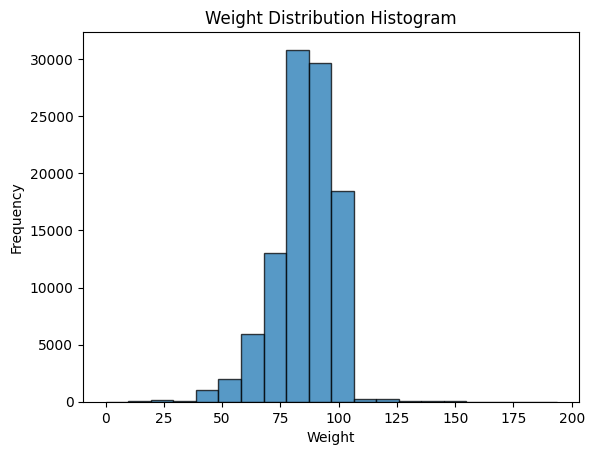

In [1258]:
import matplotlib.pyplot as plt

# Plot histogram for the 'weight' column
plt.hist(df['weight'], bins=20, edgecolor='black', alpha=0.75)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight Distribution Histogram')

# Show the plot
plt.show()

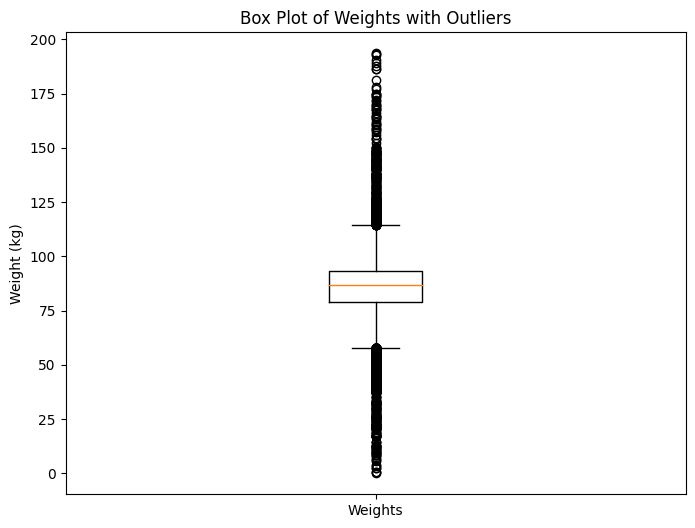

In [1259]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['weight'], showfliers=True)
plt.title('Box Plot of Weights with Outliers')
plt.ylabel('Weight (kg)')
plt.xticks([1], ['Weights'])

plt.show()

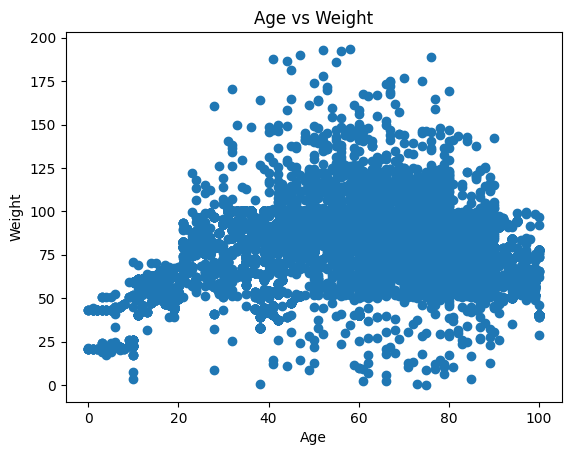

In [1260]:
plt.scatter(df['age'], df['weight'])
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Age vs Weight')
plt.show()

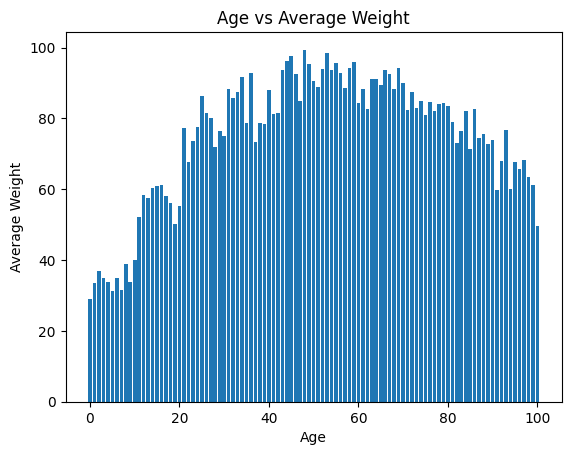

In [1261]:
# Group the DataFrame by age and calculate the mean weight for each age group
age_weight = df.groupby('age')['weight'].mean().reset_index()

# Create the bar chart
plt.bar(age_weight['age'], age_weight['weight'])
plt.xlabel('Age')
plt.ylabel('Average Weight')
plt.title('Age vs Average Weight')
plt.show()

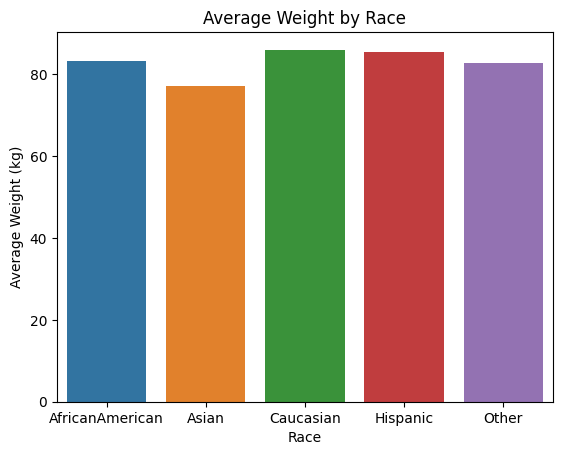

In [1262]:
# Group the data by 'race' and calculate the mean weight for each race group
race_weight_data = df.groupby('race')['weight'].mean().reset_index()

# Create the bar plot
sns.barplot(x='race', y='weight', data=race_weight_data)
plt.title("Average Weight by Race")
plt.xlabel("Race")
plt.ylabel("Average Weight (kg)")

# Display the plot
plt.show()

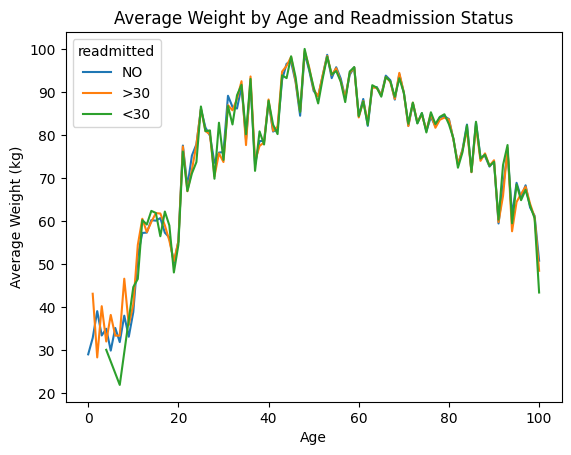

In [1263]:
# Group the data by 'age' and 'readmitted' and calculate the mean weight for each group
age_readmitted_weight_data = df.groupby(['age', 'readmitted'])['weight'].mean().reset_index()

# Create the line plot
sns.lineplot(x='age', y='weight', hue='readmitted', data=age_readmitted_weight_data)
plt.title("Average Weight by Age and Readmission Status")
plt.xlabel("Age")
plt.ylabel("Average Weight (kg)")

# Display the plot
plt.show()

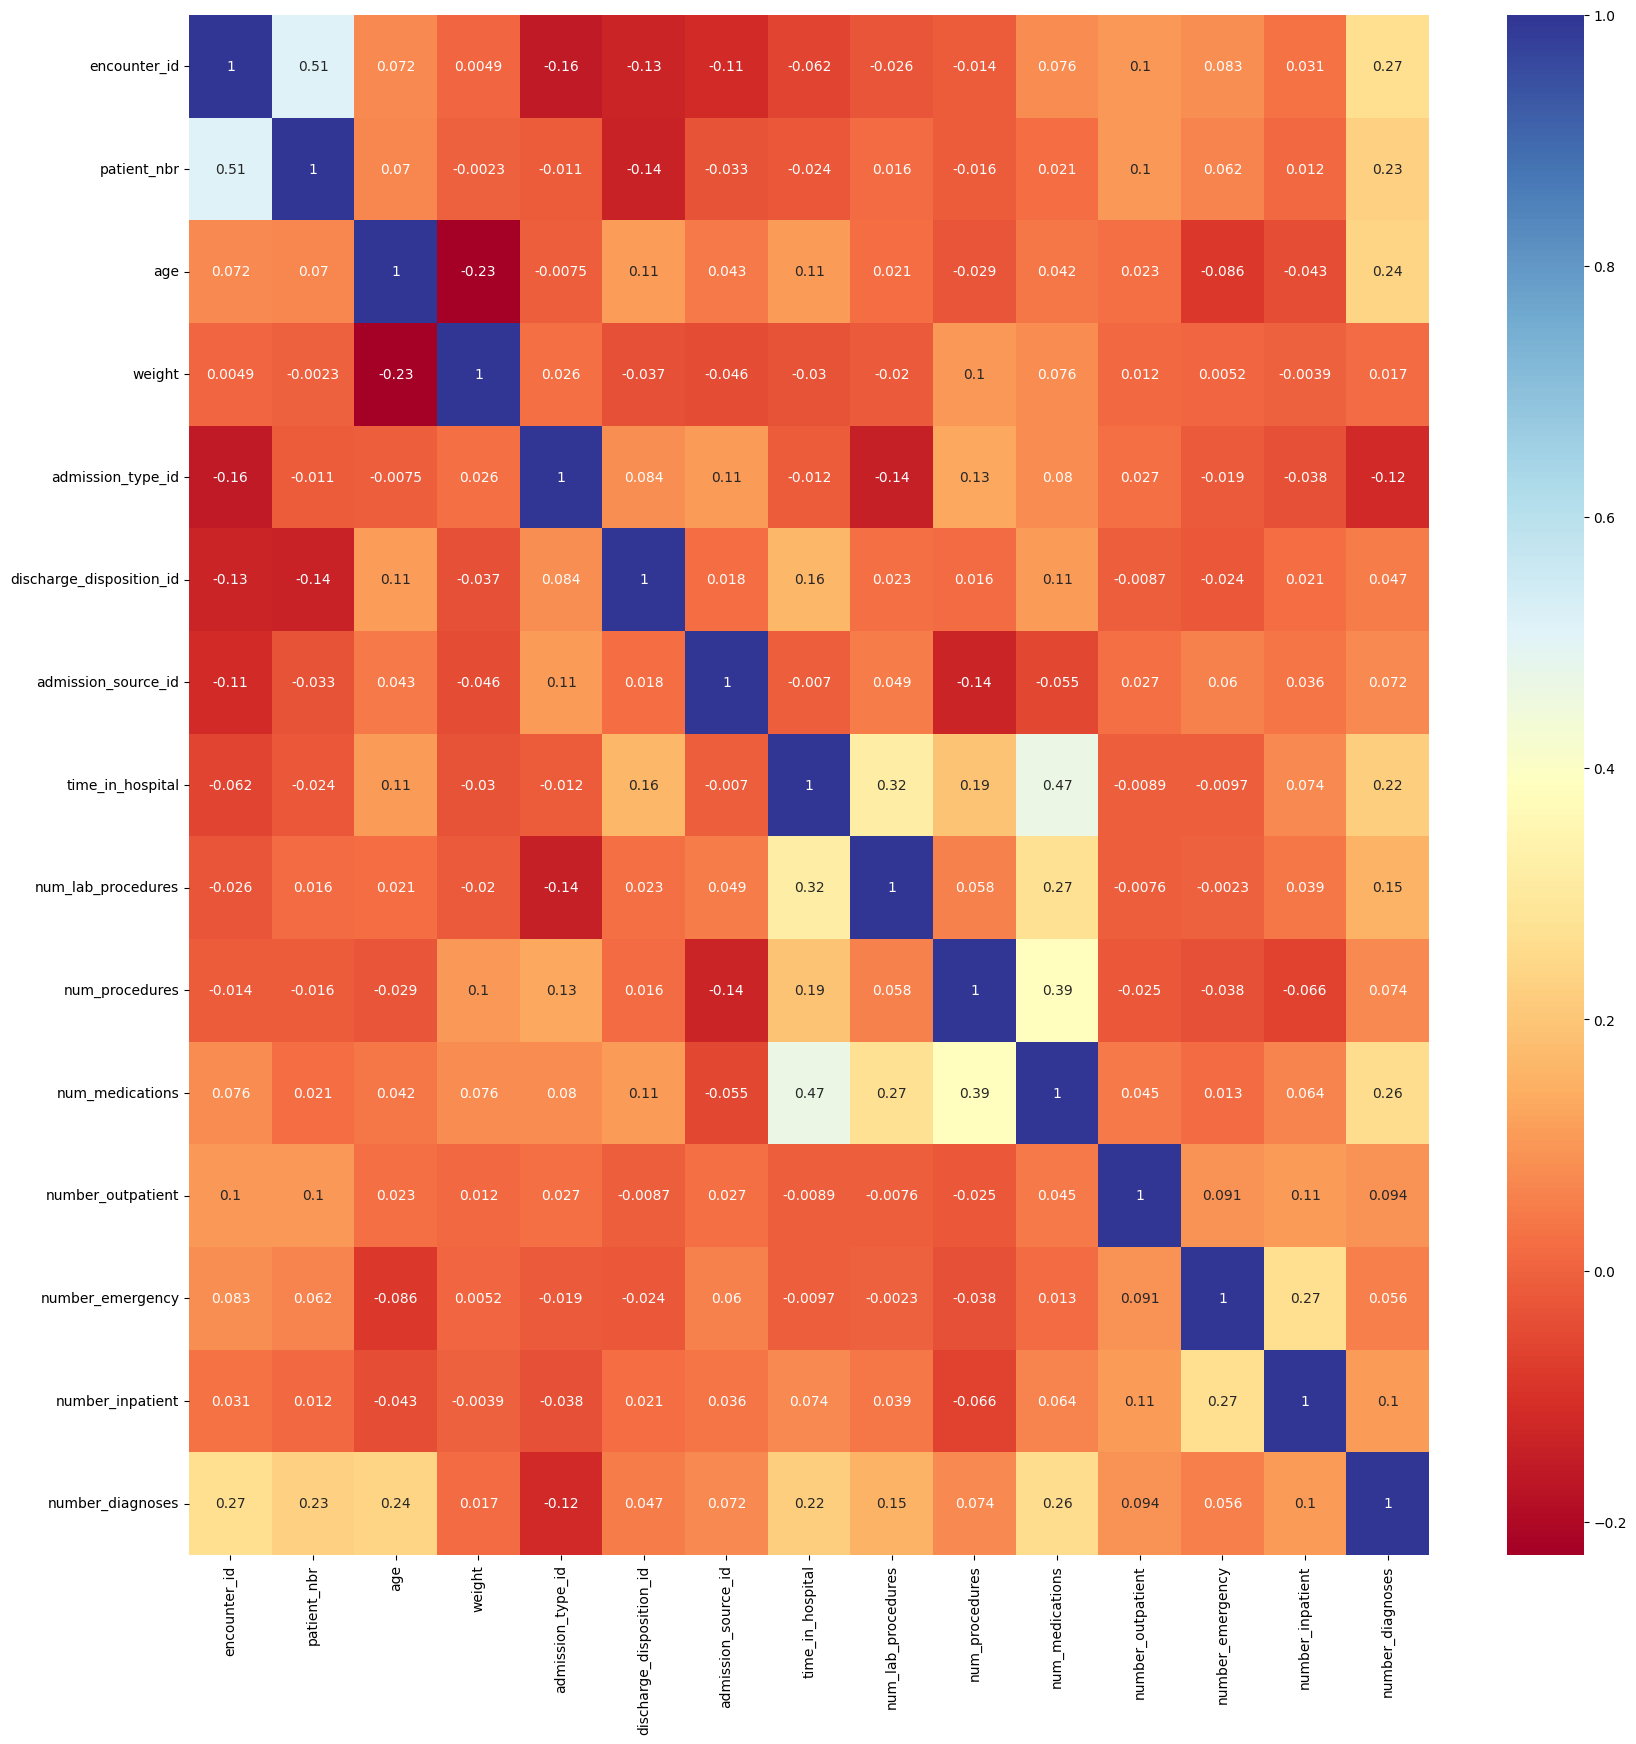

In [1264]:
## Correlation

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlBu")

In [1265]:
for i in df.columns:
    print(i, df[df[i] == '?'].shape[0])

encounter_id 0
patient_nbr 0
race 0
gender 0
age 0
weight 0
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40254
medical_specialty 49944
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 358
diag_3 1423
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [1266]:
# Change based on gender
#sns.pairplot(data, hue='gender', palette={'Female': 'red', 'Male': 'blue', 'Unknown/Invalid': 'green'})

In [1267]:
df['readmitted'].value_counts()

NO     54861
>30    35542
<30    11357
Name: readmitted, dtype: int64

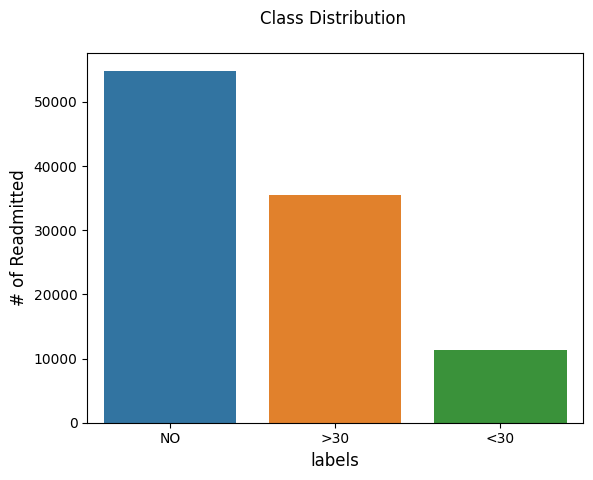

In [1268]:
ax = sns.barplot(x=df['readmitted'].value_counts().index,   y=df['readmitted'].value_counts())
plt.xlabel('labels', size = 12)
plt.ylabel('# of Readmitted', size = 12)
plt.title('Class Distribution \n', size = 12)
plt.show()

In [1269]:
#Created Another label to map <30 and >30 to 1 class for better Analysis and Classification.
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [1270]:
# Created another column and take it as 2 class problem, Label the <30 and >30 as YES and Other "N0" as No.

def check_label(text):
    if text == '>30' or text =='<30':
        return 'Yes'
    else:
        return 'No'
    
df['readmitted_2'] =df['readmitted'].apply(check_label) 

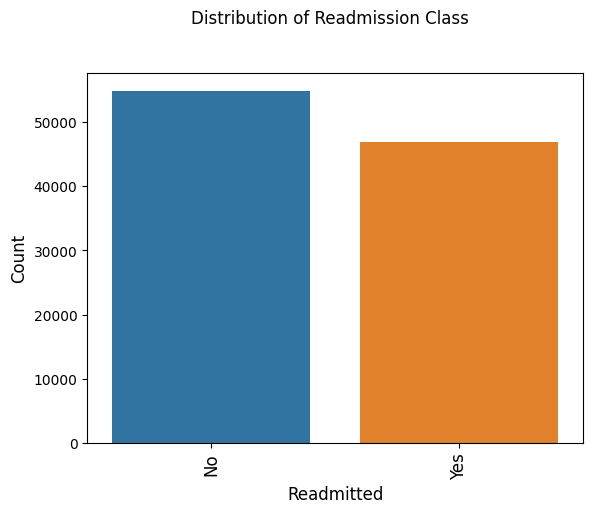

In [1271]:
ax = sns.countplot(x='readmitted_2',   data= df)
plt.xlabel('Readmitted', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Readmission Class  \n\n', size = 12)
plt.show()

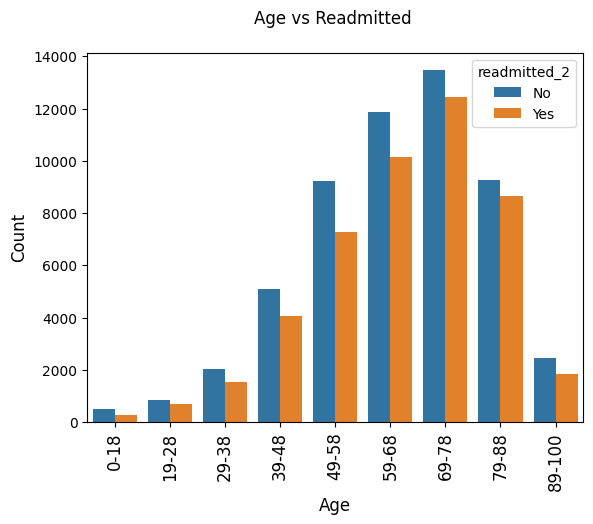

In [1272]:
# Define age groups
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 100]
labels = ['0-18', '19-28', '29-38', '39-48', '49-58', '59-68', '69-78', '79-88', '89-100']

# Create age groups column without saving to dataframe
age_groups = pd.cut(df['age'], bins=bins, labels=labels)

# Plot countplot with age groups
ageax = sns.countplot(x=age_groups, hue="readmitted_2", data=df)
plt.xlabel('Age', size=12)
plt.xticks(rotation=90, size=12)
plt.ylabel('Count', size=12)
plt.title('Age vs Readmitted \n', size=12)
plt.show()

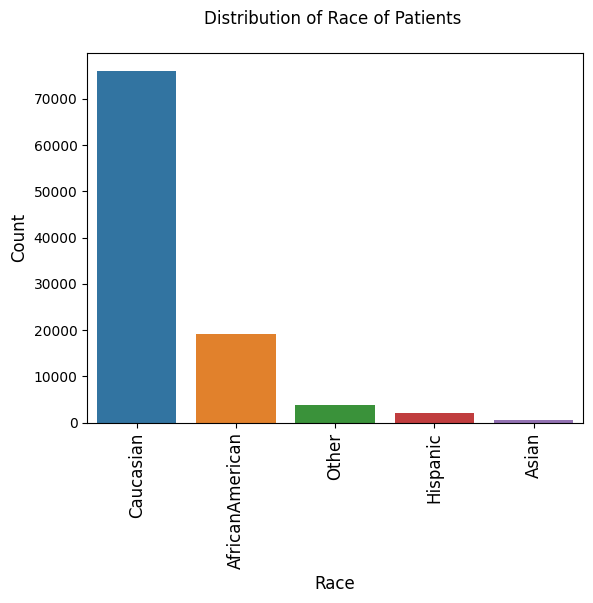

In [1273]:
ax = sns.barplot(x=df['race'].value_counts().index,   y=df['race'].value_counts())
plt.xlabel('Race', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Race of Patients \n', size = 12)
plt.show()

In [1274]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_2
0,2278392,8222157,Caucasian,Female,3,43.163637,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,No
1,149190,55629189,Caucasian,Female,14,62.691528,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,Yes
2,64410,86047875,AfricanAmerican,Female,20,53.712225,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,No
3,500364,82442376,Caucasian,Male,35,70.781876,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,No
4,16680,42519267,Caucasian,Male,41,86.357175,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,No


In [1275]:
df.drop(columns =['medical_specialty'], inplace = True)

In [1276]:
df.drop(columns = ['acetohexamide', 'payer_code','tolbutamide', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
                   'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                   'metformin-pioglitazone'], inplace = True)

In [1277]:
df.shape

(101760, 39)

In [1278]:
df = df[~((df['diag_1'] == "?") | (df['diag_2'] == "?") | (df['diag_3'] == "?"))]

In [1279]:
df.shape

(100238, 39)

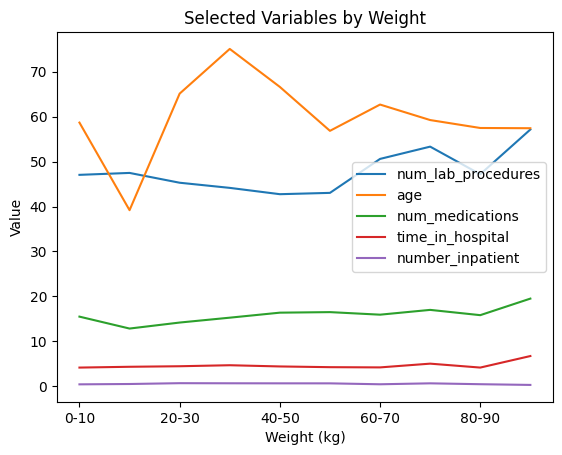

In [1280]:
# Select variables to plot
df_selected = df[['num_lab_procedures', 'age', 'weight', 'num_medications', 'time_in_hospital', 'number_inpatient']]

# Group data by weight and calculate mean for each variable
bins = pd.cut(df_selected['weight'], bins=10, labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
df_grouped = df_selected.groupby(bins).mean()

# Create line graph with all variables in relation to weight
df_grouped.plot(y=['num_lab_procedures', 'age', 'num_medications', 'time_in_hospital', 'number_inpatient'], kind='line')
plt.title('Selected Variables by Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Value')
plt.show()

# **Transform Categorical Features**

In [1281]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

In [1282]:
categorical_features =['race', 'weight','gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed'] 

for i in categorical_features:
    df[i] = le.fit_transform(df[i])

In [1283]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted,readmitted_2
1,149190,55629189,2,0,14,762,0,0,6,3,...,1,1,1,1,3,1,0,1,>30,Yes
2,64410,86047875,0,0,20,353,0,0,6,2,...,1,1,1,1,1,1,1,1,NO,No
3,500364,82442376,2,1,35,1149,0,0,6,2,...,1,1,1,1,3,1,0,1,NO,No
4,16680,42519267,2,1,41,2185,0,0,6,1,...,1,1,1,1,2,1,0,1,NO,No
5,35754,82637451,2,1,50,2468,1,0,1,3,...,1,1,1,1,2,1,1,1,>30,Yes


# **Split Train Test Data**

In [1284]:
label = le.fit(df['readmitted_2'])

In [1285]:
df['readmitted_2_encoded'] = label.transform(df['readmitted_2'])  #After Label Encoding the values assigned to class values are O:No Yes:1

In [1286]:
df= df.drop(columns= ['encounter_id', 'patient_nbr', 'readmitted','readmitted_2']) #Feature  to drop

In [1287]:
df

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted_2_encoded
1,2,0,14,762,0,0,6,3,59,0,...,1,1,1,1,1,3,1,0,1,1
2,0,0,20,353,0,0,6,2,11,5,...,1,1,1,1,1,1,1,1,1,0
3,2,1,35,1149,0,0,6,2,44,1,...,1,1,1,1,1,3,1,0,1,0
4,2,1,41,2185,0,0,6,1,51,0,...,1,1,1,1,1,2,1,0,1,0
5,2,1,50,2468,1,0,1,3,31,6,...,1,1,1,1,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101755,0,1,76,607,0,2,6,3,51,0,...,1,1,1,1,1,0,1,0,1,1
101756,0,0,86,1681,0,3,4,5,33,3,...,1,1,1,1,1,2,1,1,1,0
101757,2,1,72,2419,0,0,6,1,53,0,...,1,1,1,1,1,0,1,0,1,0
101758,2,0,85,1068,1,2,6,10,45,2,...,1,2,1,1,1,3,1,0,1,0


In [1288]:
df.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted_2_encoded'],
      dtype='object')

In [1289]:
#Split dependent and independant parameters 
X = df.drop(columns= ['readmitted_2_encoded'])
Y = df['readmitted_2_encoded']

In [1290]:
# Feature scaling
from sklearn import preprocessing
scaled_X = preprocessing.StandardScaler().fit_transform(X)

In [1291]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.20, random_state=42)

In [1292]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80190, 35), (20048, 35), (80190,), (20048,))

In [1293]:
# Train the random forest classifier model
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [1294]:
# Predict the test set results
y_pred = classifier.predict(X_test)

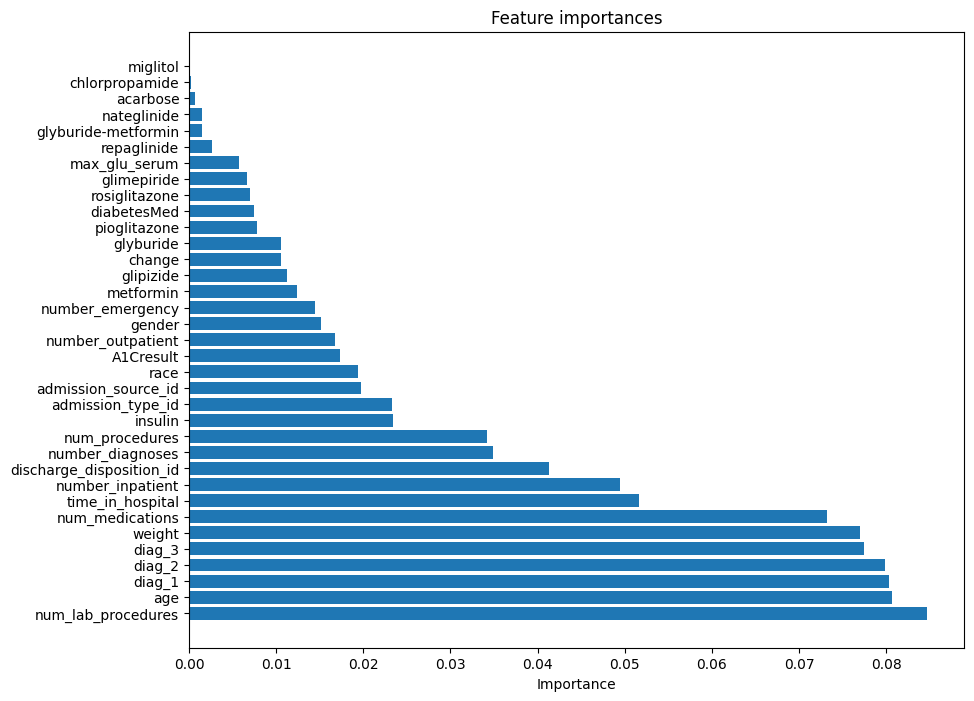

In [1295]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Define features and target
X = df.drop('readmitted_2_encoded', axis=1) # features
y = df['readmitted_2_encoded'] # target

# Initialize random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Fit the model to the data
rfc.fit(X, y)

# Get feature importances from the model
importances = rfc.feature_importances_

# Create a barplot to visualize feature importances with variable attribute on y-axis
features = X.columns
indices = np.argsort(importances)[::-1] # sort features by importance
plt.figure(figsize=(10,8))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices]) # horizontal bar plot
plt.yticks(range(X.shape[1]), features[indices]) # set y-axis tick labels
plt.xlabel('Importance') # set x-axis label
plt.show()

# **Model performance**

In [1296]:
# Evaluate the model performance
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[7982 2822]
 [4463 4781]]
0.636622106943336


In [1297]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 450, max_depth=9, random_state=43)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=450, random_state=43)

In [1298]:
rf_prediction =  rf.predict(X_test)

In [1299]:
print(classification_report(y_test, rf_prediction, target_names= ['Not Readmitted', 'Readmitted']))

                precision    recall  f1-score   support

Not Readmitted       0.63      0.78      0.70     10804
    Readmitted       0.64      0.47      0.55      9244

      accuracy                           0.64     20048
     macro avg       0.64      0.62      0.62     20048
  weighted avg       0.64      0.64      0.63     20048



In [1300]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score


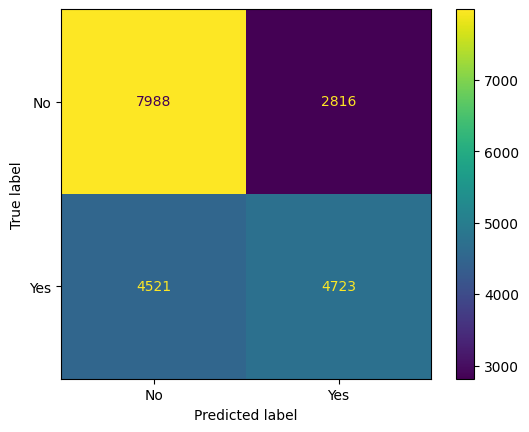

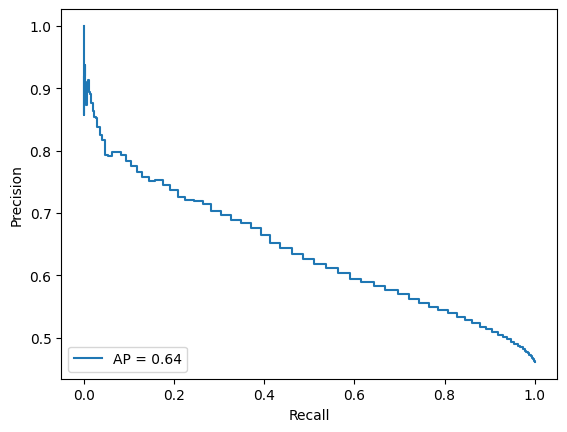

In [1301]:
# Initialize random forest classifier
rfc = RandomForestClassifier()

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = rfc.predict(X_test)

# Predict the class probabilities on the test data
y_prob = rfc.predict_proba(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
class_names = ['No', 'Yes']
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp_cm.plot()

# Plot precision-recall curve using PrecisionRecallDisplay
prec, rec, _ = precision_recall_curve(y_test, y_prob[:, 1])
disp_pr = PrecisionRecallDisplay(precision=prec, recall=rec, average_precision=average_precision_score(y_test, y_prob[:, 1]))
disp_pr.plot()

plt.show()

# Logistic Regression

In [1302]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [1303]:
#Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [1304]:
#Evaluate the model
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [1305]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.617867118914605
Confusion Matrix:
 [[8695 2109]
 [5552 3692]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.80      0.69     10804
           1       0.64      0.40      0.49      9244

    accuracy                           0.62     20048
   macro avg       0.62      0.60      0.59     20048
weighted avg       0.62      0.62      0.60     20048



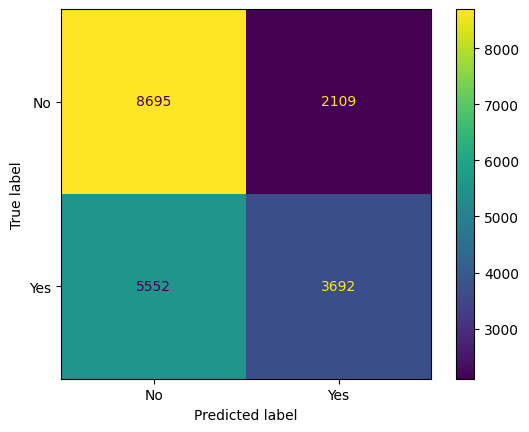

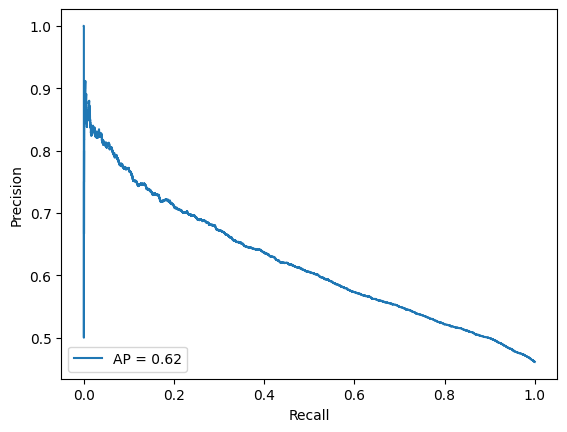

In [1306]:

# Initialize logistic regression classifier
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = lr.predict(X_test)

# Predict the class probabilities on the test data
y_prob = lr.predict_proba(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
class_names = ['No', 'Yes']
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp_cm.plot()

# Plot precision-recall curve using PrecisionRecallDisplay
prec, rec, _ = precision_recall_curve(y_test, y_prob[:, 1])
disp_pr = PrecisionRecallDisplay(precision=prec, recall=rec, average_precision=average_precision_score(y_test, y_prob[:, 1]))
disp_pr.plot()

plt.show()